# Weekly assignment 7: Choosing interpolation method

In this exercise you will check how different interpolation methods
work with different functions, after writing some diagnostic functions.

## Choosing the right interpolation method

Review the code in Lecture 7, part 1 to refresh your memory about

1. Linear interpolation  
1. Quadratic and cubic splines  
1. Polynomial interpolation  


Fix the interpolation window $ x \in [0,25] $, the interpolation nodes
as in the code below, and only change the interpolated function and
interpolation scheme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate # Interpolation routines

# fixed parts of the problem
a,b = 0,25 # interval
xd = np.linspace(a,b,1000) # dense grid for plotting
np.random.seed(21234) # fix random number sequences
nodes = np.sort(np.random.uniform(a,b,20)) # sorted random points

## Task 1. Measuring the accuracy

Write a function to plot the true function and the interpolation function,
and let it also return the measure of accuracy equal to the average square deviation
between the two.

More precisely, let two measures of accuracy be calculated: one calculated off
all points within the initial interval, and the second only between the min and max
nodes (so, the second one excludes the extrapolated points).

In [2]:
# write your code here
# come up with a test of your own

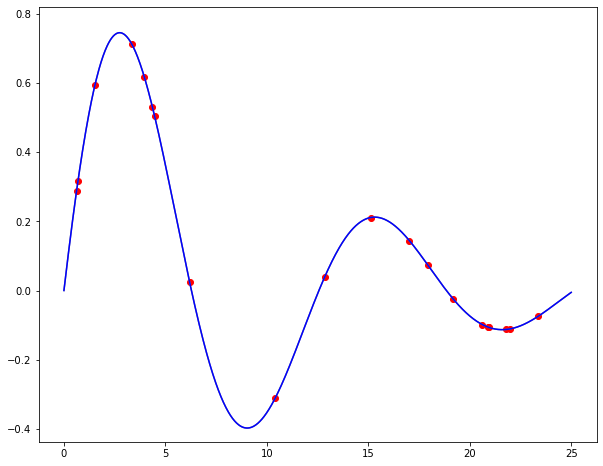

Accuracy measure is 0.0 without extrapolation it is 0.0


(0.0, 0.0)

In [3]:
func=lambda x: np.exp(-x*.1)*np.sin(x*.5) # test function to interpolate

def accuracy(ifunc,nodes=nodes,f=func,xd=xd,color='b'):
    '''helper function to make plots in this lecture'''
    ac1 = ((ifunc(xd)-f(xd))**2).mean()
    xd2 = xd[ np.logical_and(xd>=nodes[0],xd<=nodes[-1]) ]
    ac2 = ((ifunc(xd2)-f(xd2))**2).mean()
    plt.figure(num=1, figsize=(10,8))
    plt.scatter(nodes,f(nodes),color='r') # interpolation data
    plt.plot(xd,f(xd),color='grey') # true function
    plt.plot(xd,ifunc(xd),color=color) # interpolated
    mn = min(np.min(f(xd)),np.min(ifunc(xd2))) # correct ylim
    mm = max(np.max(f(xd2)),np.max(ifunc(xd2)))
    plt.ylim(mn-0.1*np.abs(mn),mm+0.1*np.abs(mm))
    plt.show()
    print('Accuracy measure is',ac1,'without extrapolation it is',ac2)
    return ac1,ac2

accuracy(func) # just testing
# accuracy(lambda x: np.full(x.shape,0.4)) # just testing

## Task 2. Interpolating smooth function

Compare the accuracy of all three schemes above to interpolate

$$
f(x) = \exp(-x/10)\sin(x/2)
$$

Hint: use *fill_value=”extrapolate”* option in *interp1d()* to allow for extrapolation

Which interpolation scheme is most accurate?

In [4]:
# write your code here

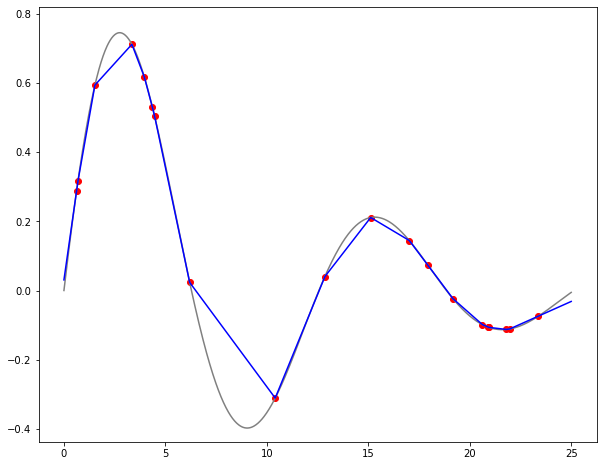

Accuracy measure is 0.0048154558345131415 without extrapolation it is 0.005269455153827233


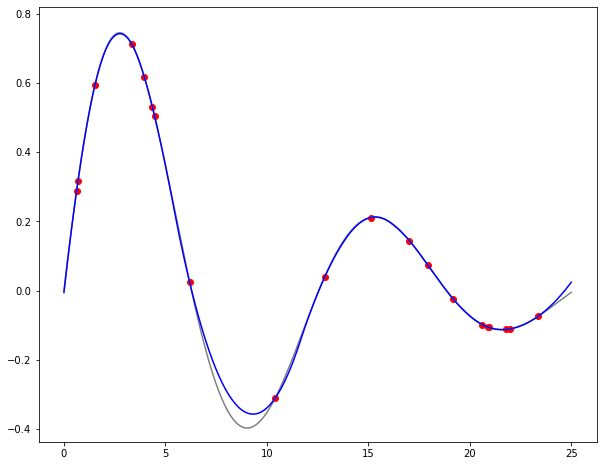

Accuracy measure is 0.00023717237908655648 without extrapolation it is 0.00024767903504133187


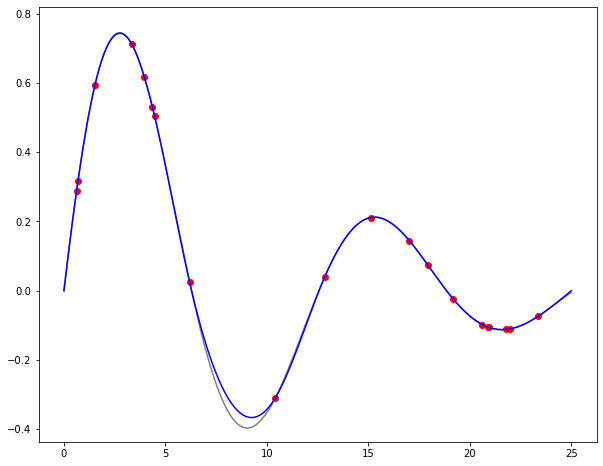

Accuracy measure is 0.00012180922159612163 without extrapolation it is 0.00013356764006814976


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: The fit may be poorly conditioned
  import sys


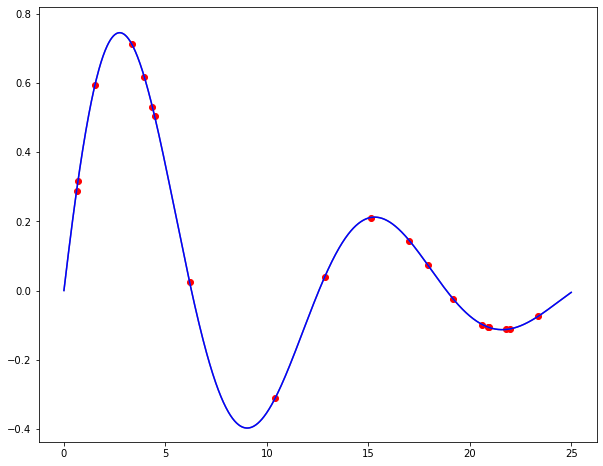

Accuracy measure is 2.1583874038497443e-11 without extrapolation it is 2.0851442427976765e-15
Accuracy by interpolation method (with and without extrapolations):
{'cubic': (0.00012180922159612163, 0.00013356764006814976),
 'polynomial': (2.1583874038497443e-11, 2.0851442427976765e-15),
 'quadratic': (0.00023717237908655648, 0.00024767903504133187),
 'slinear': (0.0048154558345131415, 0.005269455153827233)}


In [5]:
func=lambda x: np.exp(-x*.1)*np.sin(x*.5)

def test_interpolation_methods(func):
    res = {}
    for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'),('polynomial','y'):
        if knd == 'polynomial':
            p = np.polynomial.polynomial.polyfit(nodes,func(nodes),len(nodes)-1)
            ifunc = lambda x: np.polynomial.polynomial.polyval(x,p)
        else:
            ifunc = interpolate.interp1d(nodes,func(nodes),kind=knd,fill_value="extrapolate")
        res[knd] = accuracy(ifunc,f=func)
    from pprint import pprint
    print('Accuracy by interpolation method (with and without extrapolations):')
    pprint(res)

test_interpolation_methods(func)

## Task 3. Interpolating complex periodic function

Compare the accuracy of all three schemes above to interpolate

$$
f(x) = x + \exp(x/10)\sin(x)
$$

Which interpolation scheme is most accurate?

In [6]:
# write your code here

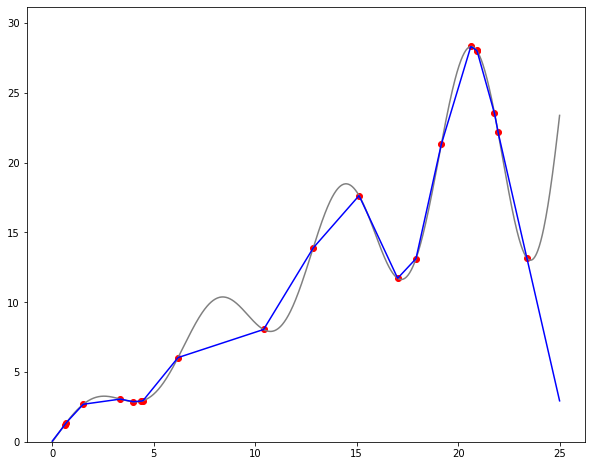

Accuracy measure is 8.28622186063715 without extrapolation it is 1.5795529605984924


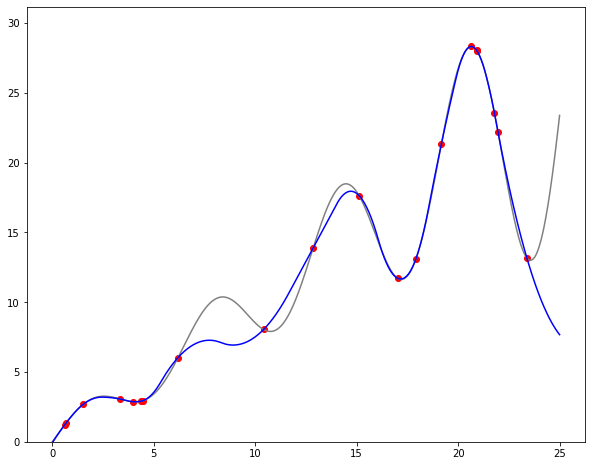

Accuracy measure is 5.036389492375467 without extrapolation it is 1.133813920178892


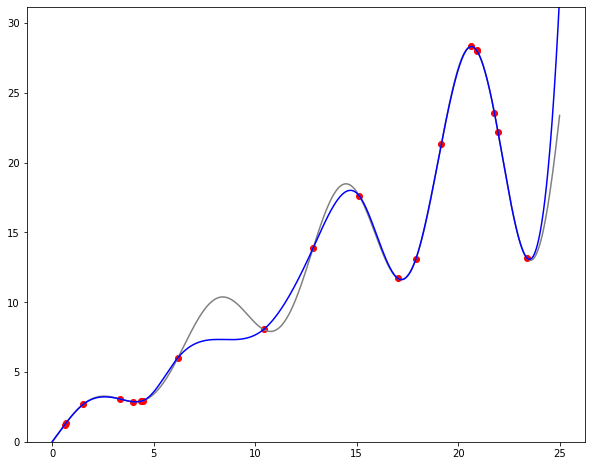

Accuracy measure is 1.5579798407719543 without extrapolation it is 0.9171172387005188


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: The fit may be poorly conditioned
  import sys


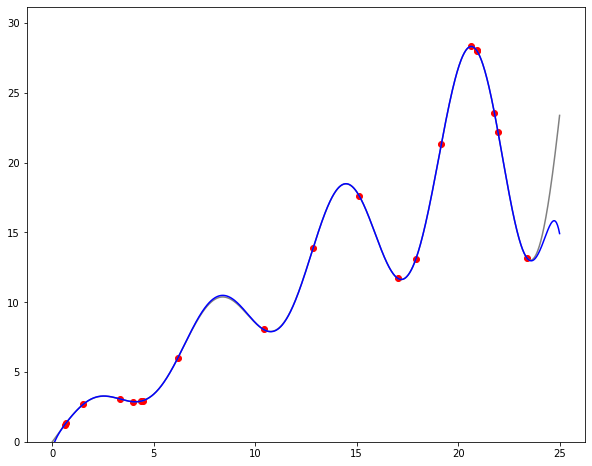

Accuracy measure is 0.5856679987532954 without extrapolation it is 0.001101610671382107
Accuracy by interpolation method (with and without extrapolations):
{'cubic': (1.5579798407719543, 0.9171172387005188),
 'polynomial': (0.5856679987532954, 0.001101610671382107),
 'quadratic': (5.036389492375467, 1.133813920178892),
 'slinear': (8.28622186063715, 1.5795529605984924)}


In [7]:
func=lambda x: x+np.exp(x*.1)*np.sin(x)
test_interpolation_methods(func)

## Task 4. Interpolating function with kinks

Compare the accuracy of all three schemes above to interpolate

$$
f(x) = \max \big( x + \exp(x/10)\sin(3x/4); x + 5  + \exp([x+5]/10)\sin(3[x+5]/4) \big)
$$

Which interpolation scheme is most accurate?

In [8]:
# write your code here

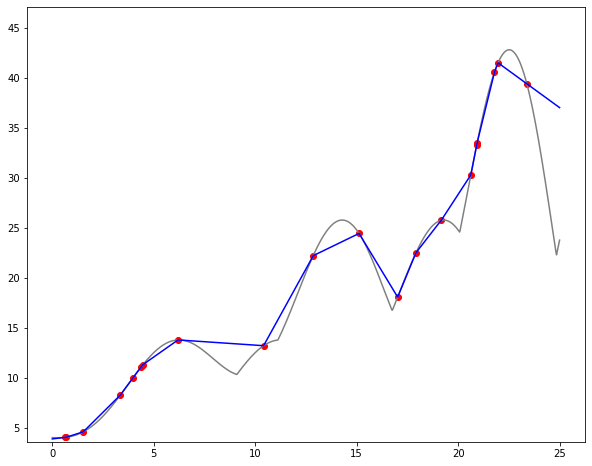

Accuracy measure is 6.5664333280198175 without extrapolation it is 1.5646583870734594


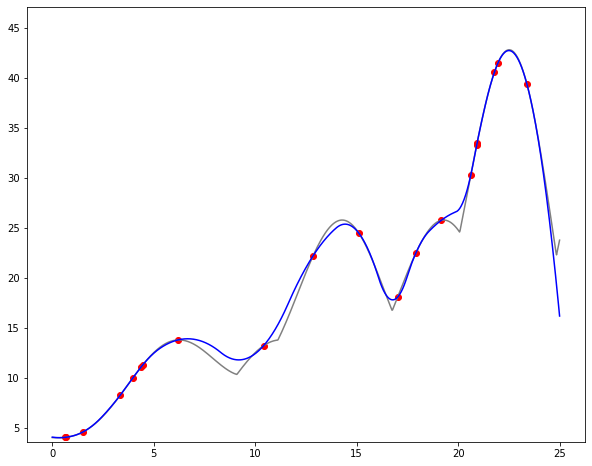

Accuracy measure is 0.6023759048665861 without extrapolation it is 0.36231898809689816


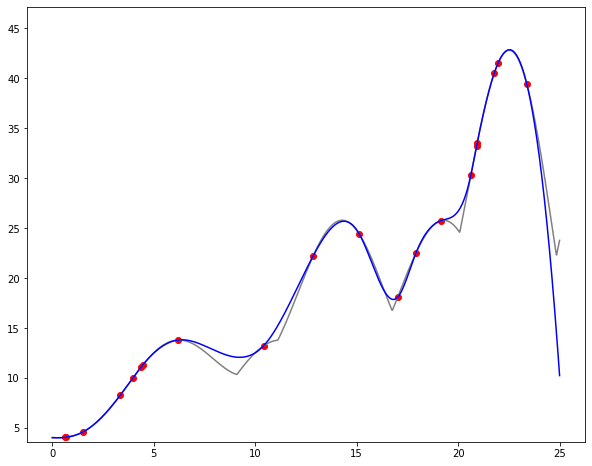

Accuracy measure is 1.6984760677618864 without extrapolation it is 0.3093409166211751


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: The fit may be poorly conditioned
  import sys


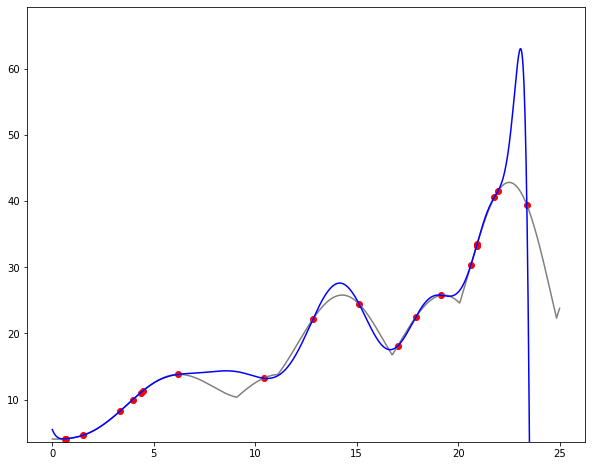

Accuracy measure is 1362424.6413284058 without extrapolation it is 10.888690908487348
Accuracy by interpolation method (with and without extrapolations):
{'cubic': (1.6984760677618864, 0.3093409166211751),
 'polynomial': (1362424.6413284058, 10.888690908487348),
 'quadratic': (0.6023759048665861, 0.36231898809689816),
 'slinear': (6.5664333280198175, 1.5646583870734594)}


In [9]:
func=lambda x: np.maximum( x+np.exp(x*.1)*np.sin(x*.75), x+5+np.exp((x+5)*.1)*np.sin((x+5)*.75) )
test_interpolation_methods(func)

## Task 5. Interpolating discontinuous function

Compare the accuracy of all three schemes above to interpolate

$$
f(x) = \exp(-x/10)\sin(x/2) + \mathbb{1}\{\cos(x)>1/2\}
$$

Which interpolation scheme is most accurate?

In [20]:
x = 3
(np.cos(x)>.5) * x / 20

0.0

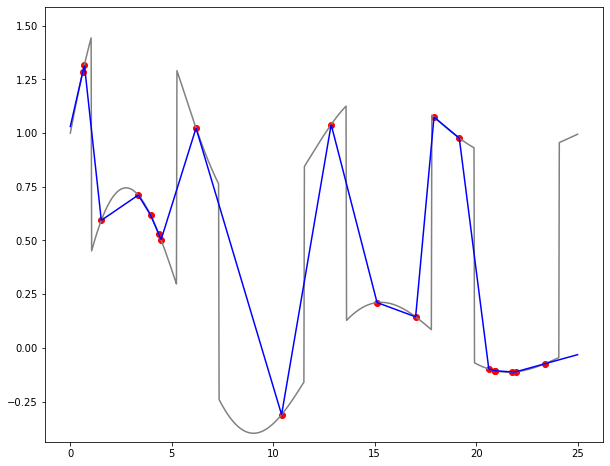

Accuracy measure is 0.12186177633232266 without extrapolation it is 0.0917153720903369


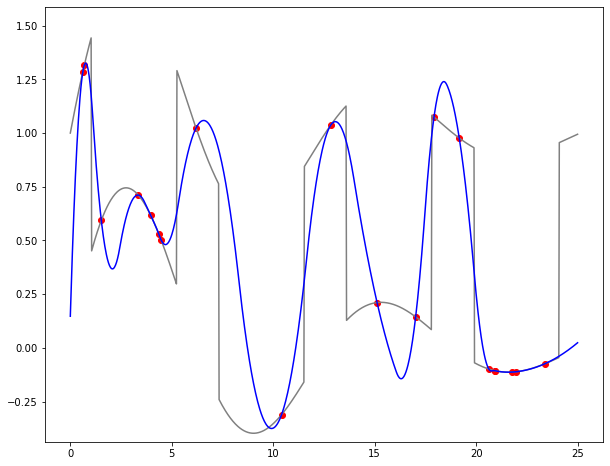

Accuracy measure is 0.13400200320308003 without extrapolation it is 0.1033214007508645


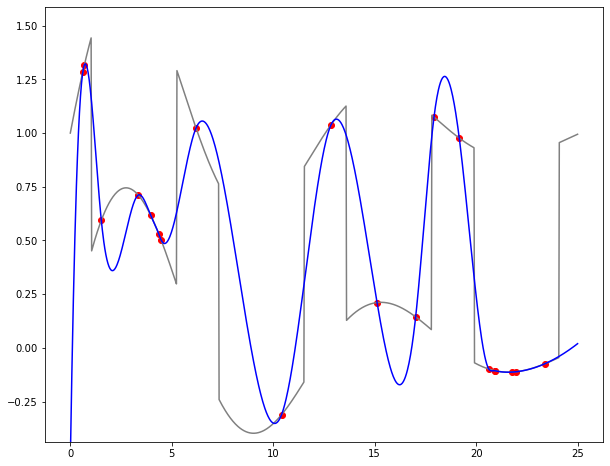

Accuracy measure is 0.14916835629956263 without extrapolation it is 0.11081126937800824


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: The fit may be poorly conditioned
  import sys


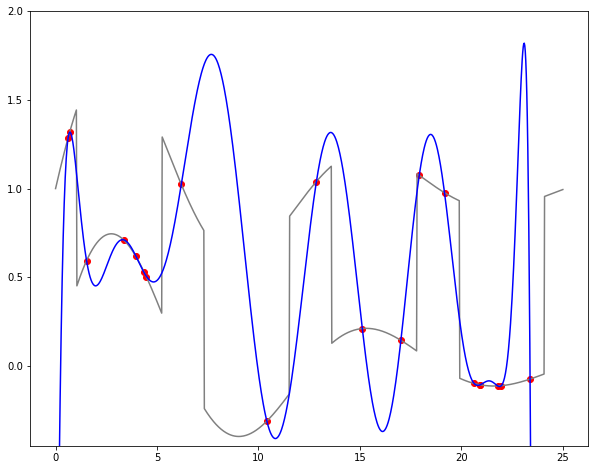

Accuracy measure is 8833.63750647909 without extrapolation it is 0.50228079503571
Accuracy by interpolation method (with and without extrapolations):
{'cubic': (0.14916835629956263, 0.11081126937800824),
 'polynomial': (8833.63750647909, 0.50228079503571),
 'quadratic': (0.13400200320308003, 0.1033214007508645),
 'slinear': (0.12186177633232266, 0.0917153720903369)}


In [12]:
func=lambda x: np.exp(-x*.1)*np.sin(x*.5)+(np.cos(x)>.5)*x/20
test_interpolation_methods(func)